In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

26.66558144978039 48.42812108454132
-24.127388614598274 32.70865233690782
-32.22739263498518 169.02807017841485
22.897400051594772 -106.31555907874663
88.90417314367656 90.25562423224812
5.930502962921267 97.32721670564723
18.788546339389015 -38.40189484354161
78.6838256924656 154.58174786556498
-67.68025057973526 170.9276174189638
-30.7660258442219 -151.00439002465413
-79.26944767068198 -104.57688240449204
85.08808315882271 -132.42519521353063
84.97514325275657 6.492322995513973
31.422150564232496 -109.52605472637498
58.9904575167223 -160.8496563850535
-50.36828996560454 90.58777191447717
-55.0361149069957 -75.33725253195293
85.34373668378225 -112.46553191749898
-5.9947390686921835 106.54902731531178
-69.718652790964 -64.63418918954193
-86.68300899118617 42.414326140267235
-7.483317788951311 -94.14224359780869
-21.091381950064218 -144.15616692707198
2.2506133633396104 -72.3951204332037
37.06713188131705 -92.12497138757155
-76.5029220797887 -106.42649495404325
-76.59198536618217 -175.4

34.97129469254085 -25.49848676127158
77.30387586440969 89.60614954290844
38.19599691373625 37.401330679547954
-61.28944124365501 148.6682726729979
51.94321711830128 55.91719346044272
56.71044737460477 -97.95688673561202
-44.88675525463157 9.784680591036647
-41.04131470943931 -157.98337097966532
70.53200986628184 -121.39359781782727
0.32682157032607506 64.33407368374606
-4.552002488599555 151.1714146587173
43.158821267000775 -99.93214030045034
87.18229676826505 154.44873665228943
-49.98089159038915 -132.61135653430546
-80.8129454681673 -161.47277704260762
-11.709750084115171 133.6202460758496
-32.05005456726624 -20.644973794041647
75.68272226511075 -7.21077171623827
53.093415879622654 10.709936092132693
63.0831528126586 55.24298465062216
-48.40309439373164 116.88259844392996
-70.79658154229384 33.8350569778338
19.195782819941684 -116.20198304743536
48.57541011860317 -61.36923818840329
86.96013401516745 -161.95629286853256
82.07341156337253 -102.94899987551983
-28.7641722360923 53.391616

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | buqayq
City not found. Skipping...
Processing Record 2 of Set 1 | chokwe
Processing Record 3 of Set 1 | ahipara
Processing Record 4 of Set 1 | agua verde
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | lhokseumawe
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | chokurdakh
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | douglas
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | teluknaga
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | puerto ayora
Processing Rec

Processing Record 32 of Set 4 | suntar
Processing Record 33 of Set 4 | brae
Processing Record 34 of Set 4 | muros
Processing Record 35 of Set 4 | baijiantan
Processing Record 36 of Set 4 | chapais
Processing Record 37 of Set 4 | duki
Processing Record 38 of Set 4 | the valley
Processing Record 39 of Set 4 | avarua
Processing Record 40 of Set 4 | salalah
Processing Record 41 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 42 of Set 4 | bengkulu
Processing Record 43 of Set 4 | port elizabeth
Processing Record 44 of Set 4 | poum
Processing Record 45 of Set 4 | sokoto
Processing Record 46 of Set 4 | esperance
Processing Record 47 of Set 4 | cabo san lucas
Processing Record 48 of Set 4 | magadan
Processing Record 49 of Set 4 | kirakira
Processing Record 50 of Set 4 | lorengau
Processing Record 1 of Set 5 | vostok
Processing Record 2 of Set 5 | shuyskoye
Processing Record 3 of Set 5 | port lincoln
Processing Record 4 of Set 5 | komsomolskiy
Processing Record 5 of Set 5 | 

Processing Record 23 of Set 8 | el balsamo
Processing Record 24 of Set 8 | cheuskiny
City not found. Skipping...
Processing Record 25 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 26 of Set 8 | kainantu
Processing Record 27 of Set 8 | shenzhen
Processing Record 28 of Set 8 | kaspiyskiy
Processing Record 29 of Set 8 | namatanai
Processing Record 30 of Set 8 | athabasca
Processing Record 31 of Set 8 | sojitra
Processing Record 32 of Set 8 | zemio
Processing Record 33 of Set 8 | victor harbor
Processing Record 34 of Set 8 | ayacucho
Processing Record 35 of Set 8 | kirensk
Processing Record 36 of Set 8 | yirol
City not found. Skipping...
Processing Record 37 of Set 8 | guerrero negro
Processing Record 38 of Set 8 | nadym
Processing Record 39 of Set 8 | sistranda
Processing Record 40 of Set 8 | luba
Processing Record 41 of Set 8 | gizo
Processing Record 42 of Set 8 | taltal
Processing Record 43 of Set 8 | quelimane
Processing Record 44 of Set 8 | bay roberts
Processing

Processing Record 7 of Set 12 | rovaniemi
Processing Record 8 of Set 12 | ponta delgada
Processing Record 9 of Set 12 | ongandjera
Processing Record 10 of Set 12 | pitimbu
Processing Record 11 of Set 12 | alanib
Processing Record 12 of Set 12 | san jose
Processing Record 13 of Set 12 | jauharabad
Processing Record 14 of Set 12 | murgab
Processing Record 15 of Set 12 | westport
Processing Record 16 of Set 12 | lebu
Processing Record 17 of Set 12 | yabrud
Processing Record 18 of Set 12 | buckeye
Processing Record 19 of Set 12 | jalu
Processing Record 20 of Set 12 | alexandria
Processing Record 21 of Set 12 | raiwala
Processing Record 22 of Set 12 | yinchuan
Processing Record 23 of Set 12 | vikhorevka
Processing Record 24 of Set 12 | saint-augustin
Processing Record 25 of Set 12 | san quintin
Processing Record 26 of Set 12 | bongandanga
Processing Record 27 of Set 12 | sao felix do xingu
Processing Record 28 of Set 12 | warqla
City not found. Skipping...
Processing Record 29 of Set 12 | j

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokwe,-24.5333,32.9833,66.96,78,37,5.14,MZ,2022-05-18 20:23:30
1,Ahipara,-35.1667,173.1667,64.62,95,100,13.82,NZ,2022-05-18 20:23:31
2,Agua Verde,22.9000,-106.0500,82.49,64,76,10.69,MX,2022-05-18 20:23:31
3,Dikson,73.5069,80.5464,30.67,94,100,11.10,RU,2022-05-18 20:23:32
4,Lhokseumawe,5.1801,97.1507,78.53,86,100,3.06,ID,2022-05-18 20:23:32
5,Ponta Do Sol,32.6667,-17.1000,70.72,82,42,4.97,PT,2022-05-18 20:23:33
6,Chokurdakh,70.6333,147.9167,28.54,91,100,4.41,RU,2022-05-18 20:23:33
7,Bluff,-46.6000,168.3333,49.80,86,95,11.68,NZ,2022-05-18 20:23:34
8,Mataura,-46.1927,168.8643,49.48,98,92,1.99,NZ,2022-05-18 20:23:34
9,Punta Arenas,-53.1500,-70.9167,46.51,76,20,4.61,CL,2022-05-18 20:23:36


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokwe,MZ,2022-05-18 20:23:30,-24.5333,32.9833,66.96,78,37,5.14
1,Ahipara,NZ,2022-05-18 20:23:31,-35.1667,173.1667,64.62,95,100,13.82
2,Agua Verde,MX,2022-05-18 20:23:31,22.9000,-106.0500,82.49,64,76,10.69
3,Dikson,RU,2022-05-18 20:23:32,73.5069,80.5464,30.67,94,100,11.10
4,Lhokseumawe,ID,2022-05-18 20:23:32,5.1801,97.1507,78.53,86,100,3.06
...,...,...,...,...,...,...,...,...,...
529,Oriximina,BR,2022-05-18 20:38:27,-1.7656,-55.8661,79.61,87,77,2.68
530,Eirunepe,BR,2022-05-18 20:38:27,-6.6603,-69.8736,76.28,66,96,3.60
531,Sirjan,IR,2022-05-18 20:38:27,29.4520,55.6814,73.58,14,0,7.20
532,Wanning,CN,2022-05-18 20:38:28,18.8003,110.3967,75.69,90,93,6.11


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

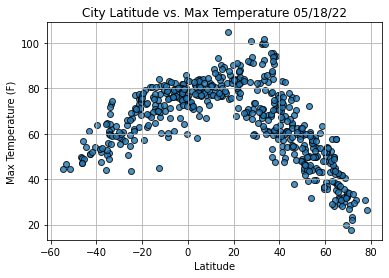

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

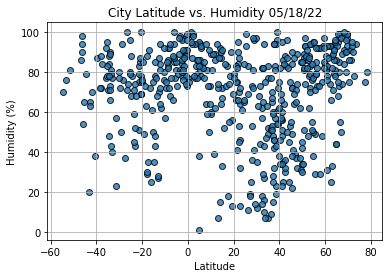

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

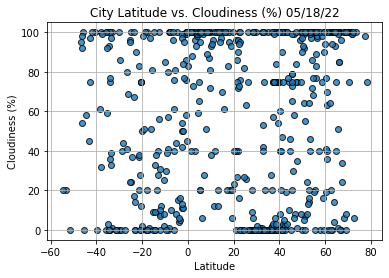

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

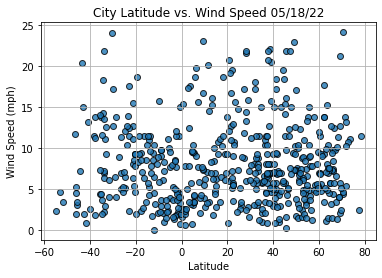

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [23]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

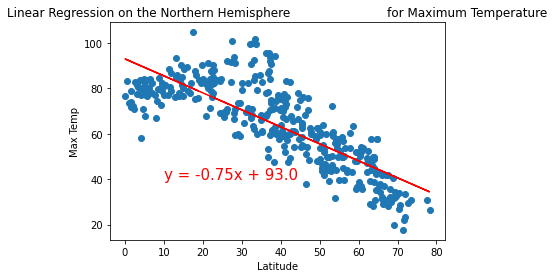

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

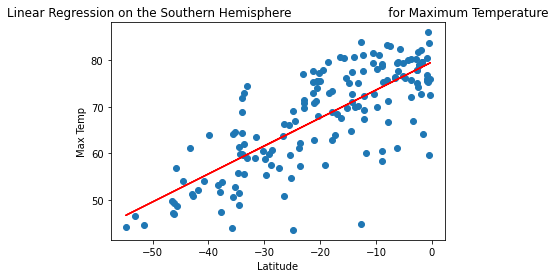

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

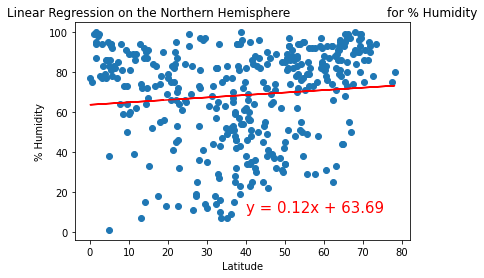

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

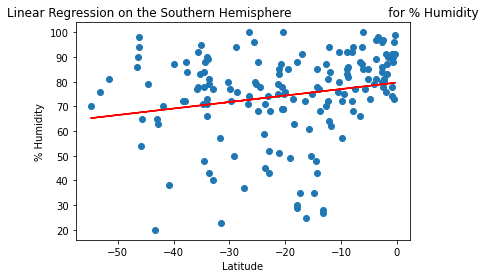

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

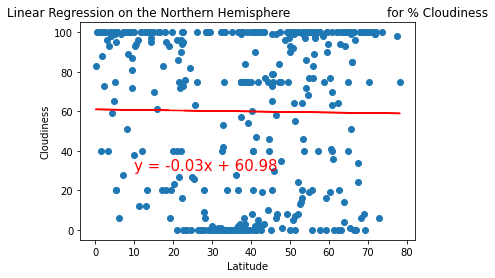

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', 'Cloudiness',(10,30))

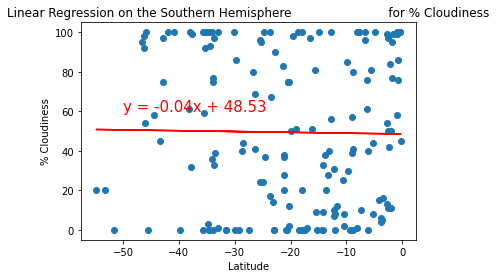

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

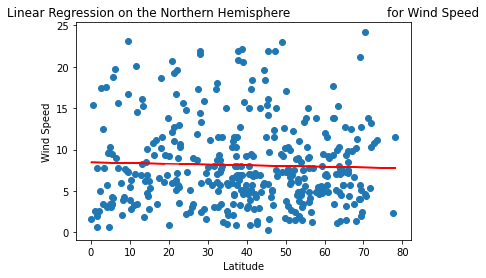

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

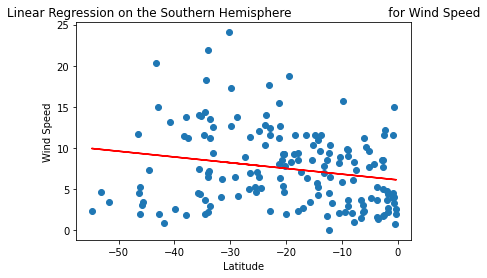

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))